In [3]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plat
import palettable as pal
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

Populating the interactive namespace from numpy and matplotlib


In [4]:
!ls -lah

total 14128
drwxr-xr-x  50 johnsolk  staff   1.6K Aug 24 06:46 .
drwxr-xr-x  60 johnsolk  staff   1.9K Aug  4 09:59 ..
-rw-r--r--@  1 johnsolk  staff   6.0K Dec  7  2018 .DS_Store
drwxr-xr-x  36 johnsolk  staff   1.1K Aug 24 06:46 .ipynb_checkpoints
-rw-r--r--   1 johnsolk  staff   1.1M Mar 22  2018 A_xenica_DE.ipynb
-rw-r--r--   1 johnsolk  staff   113K Aug  4 16:05 BUSCO_fig.ipynb
-rw-r--r--@  1 johnsolk  staff    18K Dec 10  2018 Fundulus_transcriptome_assembly_evaluation_matrix.csv
-rw-r--r--   1 johnsolk  staff    91K Feb 25  2019 GeneExpressionAllSpecies.ipynb
-rw-r--r--   1 johnsolk  staff   2.1K Jan 28  2019 OG_transcriptannotations_wordclouds.ipynb
-rw-r--r--   1 johnsolk  staff   640K Nov  1  2018 RNAseq_DE_fullmodel.ipynb
-rw-r--r--   1 johnsolk  staff   270K Jun 11 11:21 alignment_rates_plot.ipynb
-rw-r--r--   1 johnsolk  staff    38K Aug  3 13:32 annotations_addingOG.ipynb
-rw-r--r--@  1 johnsolk  staff    28K Dec  8  2018 bases.png
-rw-r--r--@  1 johnsolk  staff    45K De

In [5]:
BUSCO_met_file = "../evaluation/busco_scores_Dec2018_metazoa.csv"
BUSCO_euk_file = "../evaluation/busco_scores_Dec2018_eukaryota.csv"
BUSCO_actino_file = "../evaluation/busco_scores_Dec2018_actino.csv"
BUSCO_met = pd.read_csv(BUSCO_met_file)
BUSCO_euk = pd.read_csv(BUSCO_euk_file)
BUSCO_actino = pd.read_csv(BUSCO_actino_file)

In [6]:
BUSCO_euk.head()

,Unnamed: 0,Complete,Complete and single-copy,Complete and duplicated,Fragmented,Missing,Total,Complete_BUSCO_perc
0,F_chrysotus,299,81,218,3,1,303,98.679868
1,F_olivaceus,302,108,194,1,0,303,99.669967
2,F_zebrinus,301,109,192,2,0,303,99.339934
3,F_heteroclitus.MDPP,301,60,241,2,0,303,99.339934
4,F_heteroclitus.MDPL,300,72,228,3,0,303,99.009901


In [7]:
BUSCO_euk.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %']
BUSCO_met.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %']
BUSCO_actino.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %']
BUSCO_met['BUSCO Lineage Database'] = 'Metazoa'
BUSCO_euk['BUSCO Lineage Database'] = 'Eukaryota'
BUSCO_actino['BUSCO Lineage Database'] = 'Actinopterygii'

frames = [BUSCO_met,BUSCO_euk,BUSCO_actino]
BUSCO = pd.concat(frames)

In [8]:
BUSCO = BUSCO.sort_values(by=['species transcriptome'])
BUSCO.head()

,species transcriptome,Complete,Complete/Single-Copy,Complete/Duplicated,Fragmented,Missing,Total,Complete BUSCO %,BUSCO Lineage Database
9,F_catenatus,4015,1583,2432,220,349,4584,87.587260,Actinopterygii
9,F_catenatus,301,90,211,2,0,303,99.339934,Eukaryota
9,F_catenatus,966,314,652,7,5,978,98.773006,Metazoa
0,F_chrysotus,966,312,654,6,6,978,98.773006,Metazoa
0,F_chrysotus,299,81,218,3,1,303,98.679868,Eukaryota


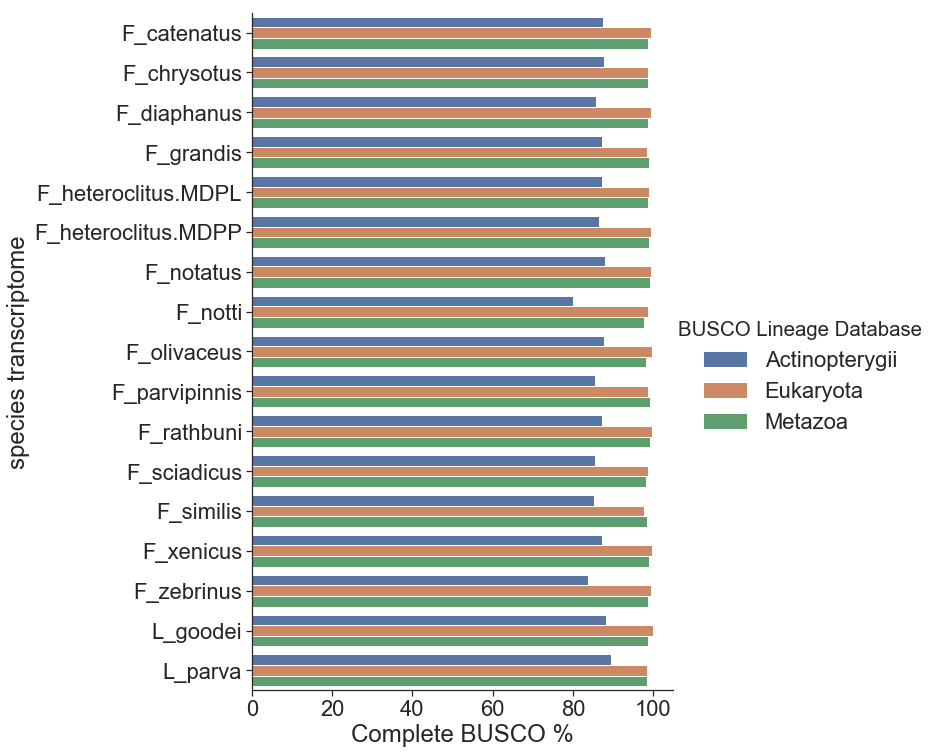

In [16]:
sns.set_style('ticks')
#sns.set(font_scale=2)
a = sns.factorplot(x="Complete BUSCO %", y="species transcriptome", hue="BUSCO Lineage Database", data=BUSCO, kind="bar", orient='h',size=11);
sns.despine()
sns.set_style("white")
a.savefig('../evaluation/busco_all.png')